# getDistanceToLigand

Read in the target pdb file, get the positions and b-factors (which have been set to the average SOAP similarity), and then wget the ligand information. We then plot the ligand distance vs similarity.

In [2]:
import ase
import ase.io
import numpy as np
import matplotlib.pyplot as plt
import subprocess

In [2]:
pdbRef = "1h97"
chainRef = "A"
path_to_file = "averageSim/{}{}_heme_vshemes.pdb".format(pdbRef, chainRef)
protein = ase.io.read(path_to_file, format="proteindatabank")


In [3]:
positions = protein.arrays["positions"]
bfactors = protein.arrays["bfactor"]

In [4]:
bfactors

array([0.47, 0.44, 0.86, ..., 0.97, 1.02, 0.76])

In [5]:
!wget http://www.rcsb.org/pdb/files/{pdbRef}.pdb

--2019-07-16 11:32:08--  http://www.rcsb.org/pdb/files/1h97.pdb
Resolving www.rcsb.org (www.rcsb.org)... 128.6.244.65
Connecting to www.rcsb.org (www.rcsb.org)|128.6.244.65|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://files.rcsb.org/view/1h97.pdb [following]
--2019-07-16 11:32:08--  http://files.rcsb.org/view/1h97.pdb
Resolving files.rcsb.org (files.rcsb.org)... 128.6.244.12
Connecting to files.rcsb.org (files.rcsb.org)|128.6.244.12|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘1h97.pdb’

1h97.pdb                [  <=>               ] 492.72K  1.12MB/s    in 0.4s    

2019-07-16 11:32:08 (1.12 MB/s) - ‘1h97.pdb’ saved [504549]



In [6]:
with open("{}.pdb".format(pdbRef)) as flines:
    pdbdata = flines.readlines()

In [7]:
!rm {pdbRef}.pdb

In [8]:
ligand_data = []
for line in pdbdata:
    if line.startswith("HETATM"):
        ligandid = "HEM"
        if line[17:20] == ligandid and line[21] == chainRef:
            ligand_data.append(line.strip())

In [9]:
with open("temp.pdb", "w") as outflines:
    outflines.write("\n".join(ligand_data))
ligand = ase.io.read("temp.pdb", format="proteindatabank")


In [10]:
ligand.arrays["positions"]

array([[25.772, 28.699, 22.659],
       [26.181, 31.647, 20.959],
       [28.863, 27.619, 21.483],
       [25.345, 25.76 , 24.28 ],
       [22.663, 29.757, 23.747],
       [27.195, 29.485, 21.455],
       [27.191, 30.704, 20.81 ],
       [28.384, 30.799, 19.992],
       [29.062, 29.666, 20.106],
       [28.347, 28.843, 21.068],
       [30.398, 29.316, 19.426],
       [28.672, 32.003, 19.064],
       [27.839, 31.922, 17.777],
       [28.359, 32.715, 16.604],
       [29.622, 32.767, 16.388],
       [27.402, 33.184, 15.909],
       [26.913, 27.065, 22.926],
       [28.142, 26.809, 22.346],
       [28.598, 25.517, 22.75 ],
       [27.655, 24.969, 23.55 ],
       [26.547, 25.912, 23.612],
       [29.998, 24.912, 22.396],
       [27.627, 23.63 , 24.236],
       [28.162, 22.51 , 23.736],
       [24.33 , 27.938, 23.827],
       [24.274, 26.633, 24.308],
       [22.995, 26.386, 24.943],
       [22.248, 27.5  , 24.782],
       [23.075, 28.48 , 24.085],
       [22.598, 25.063, 25.593],
       [20

In [11]:
ligand_centroid = np.mean(ligand.arrays["positions"], axis=0)

In [12]:
distance_from_centroid = np.linalg.norm(positions-ligand_centroid,axis=1)

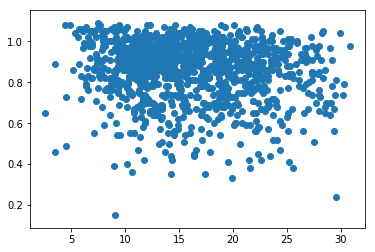

In [13]:
plt.scatter(distance_from_centroid, bfactors)

In [16]:
# get the distance to the nearest ligand atom instead

distance_from_nearest_ligand_atom = []
for position in positions:
    distance_to_ligand = np.min(np.linalg.norm(position-ligand.arrays["positions"],axis=1))
    distance_from_nearest_ligand_atom.append(distance_to_ligand)

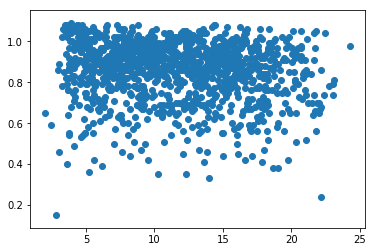

In [17]:
plt.scatter(distance_from_nearest_ligand_atom, bfactors)

Now repeat all the above analysis using a counter-based approach, rather than averaging.

In [18]:
pdbRef = "1h97"
chainRef = "A"
path_to_file = "counterSim/{}{}_heme_vshemes.pdb".format(pdbRef, chainRef)
protein = ase.io.read(path_to_file, format="proteindatabank")


In [19]:
positions = protein.arrays["positions"]
bfactors = protein.arrays["bfactor"]

In [20]:
!wget http://www.rcsb.org/pdb/files/{pdbRef}.pdb

--2019-07-16 11:34:39--  http://www.rcsb.org/pdb/files/1h97.pdb
Resolving www.rcsb.org (www.rcsb.org)... 128.6.244.65
Connecting to www.rcsb.org (www.rcsb.org)|128.6.244.65|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://files.rcsb.org/view/1h97.pdb [following]
--2019-07-16 11:34:39--  http://files.rcsb.org/view/1h97.pdb
Resolving files.rcsb.org (files.rcsb.org)... 128.6.244.12
Connecting to files.rcsb.org (files.rcsb.org)|128.6.244.12|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘1h97.pdb’

1h97.pdb                [  <=>               ] 492.72K  1.10MB/s    in 0.4s    

2019-07-16 11:34:40 (1.10 MB/s) - ‘1h97.pdb’ saved [504549]



In [21]:
with open("{}.pdb".format(pdbRef)) as flines:
    pdbdata = flines.readlines()

In [22]:
!rm {pdbRef}.pdb

In [23]:
ligand_data = []
for line in pdbdata:
    if line.startswith("HETATM"):
        ligandid = "HEM"
        if line[17:20] == ligandid and line[21] == chainRef:
            ligand_data.append(line.strip())

In [24]:
with open("temp.pdb", "w") as outflines:
    outflines.write("\n".join(ligand_data))
ligand = ase.io.read("temp.pdb", format="proteindatabank")


In [26]:
ligand_centroid = np.mean(ligand.arrays["positions"], axis=0)

In [27]:
distance_from_centroid = np.linalg.norm(positions-ligand_centroid,axis=1)

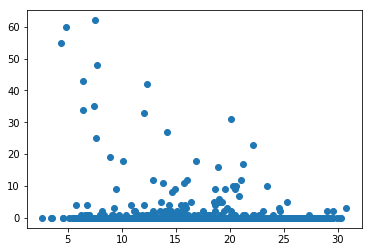

In [28]:
plt.scatter(distance_from_centroid, bfactors)

In [29]:
# get the distance to the nearest ligand atom instead
distance_from_nearest_ligand_atom = []
for position in positions:
    distance_to_ligand = np.min(np.linalg.norm(position-ligand.arrays["positions"],axis=1))
    distance_from_nearest_ligand_atom.append(distance_to_ligand)

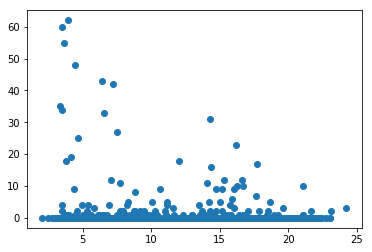

In [30]:
plt.scatter(distance_from_nearest_ligand_atom, bfactors)

In [8]:
def plotDistanceVsBFactor(pdb_ref, chain_ref, path_to_file):
    protein = ase.io.read(path_to_file, format="proteindatabank")
    positions = protein.arrays["positions"]
    bfactors = protein.arrays["bfactor"]
    subprocess.call(["wget","http://www.rcsb.org/pdb/files/{}.pdb".format(pdb_ref)])
    with open("{}.pdb".format(pdb_ref)) as flines:
        pdb_data = flines.readlines()
        
        
    ligand_data = []
    for line in pdb_data:
        if line.startswith("HETATM"):
            ligand_id = "HEM"
            if line[17:20] == ligand_id and line[21] == chain_ref:
                ligand_data.append(line.strip())
    
    with open("temp.pdb", "w") as outflines:
        outflines.write("\n".join(ligand_data))
    ligand = ase.io.read("temp.pdb", format="proteindatabank")

    subprocess.call(["rm", "{}.pdb".format(pdb_ref)])
    subprocess.call(["rm", "temp.pdb"])    
    
    
    ligand_centroid = np.mean(ligand.arrays["positions"], axis=0)
    distance_from_centroid = np.linalg.norm(positions-ligand_centroid,axis=1)
    plt.scatter(distance_from_centroid, bfactors)
    plt.title("Distance from centroid")
#     plt.ylim([1.0,1.2])
    plt.show()
    
    # get the distance to the nearest ligand atom instead
    distance_from_nearest_ligand_atom = []
    for position in positions:
        distance_to_ligand = np.min(np.linalg.norm(position-ligand.arrays["positions"],axis=1))
        distance_from_nearest_ligand_atom.append(distance_to_ligand)
    plt.title("Distance to closest atom")
#     plt.ylim([1.0,1.2])
    plt.scatter(distance_from_nearest_ligand_atom, bfactors)
    plt.show()
    

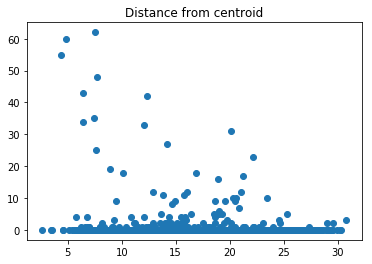

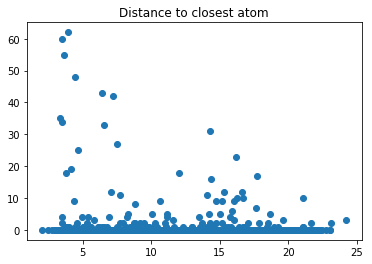

In [36]:
pdbRef = "1h97"
chainRef = "A"
path_to_file = "counterSim/{}{}_heme_vshemes.pdb".format(pdbRef, chainRef)
plotDistanceVsBFactor(pdbRef, chainRef, path_to_file)

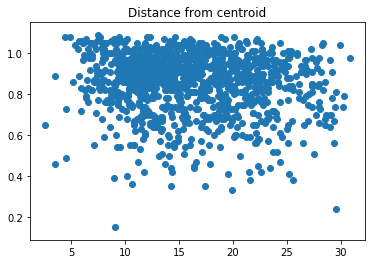

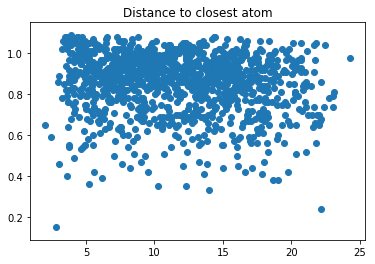

In [37]:
pdbRef = "1h97"
chainRef = "A"
path_to_file = "averageSim/{}{}_heme_vshemes.pdb".format(pdbRef, chainRef)
plotDistanceVsBFactor(pdbRef, chainRef, path_to_file)

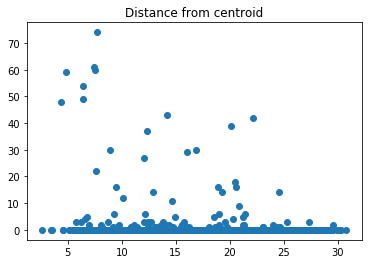

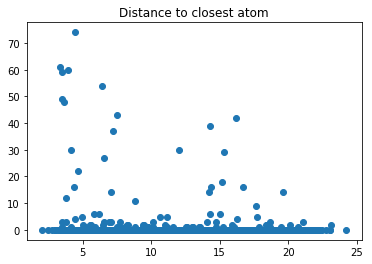

In [39]:
pdbRef = "1h97"
chainRef = "A"
path_to_file = "counterSim/{}{}_heme_vsnucleos.pdb".format(pdbRef, chainRef)
plotDistanceVsBFactor(pdbRef, chainRef, path_to_file)

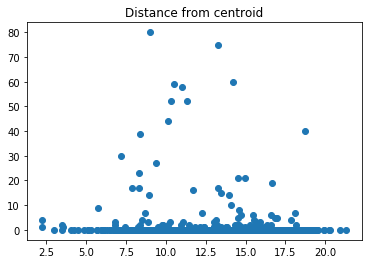

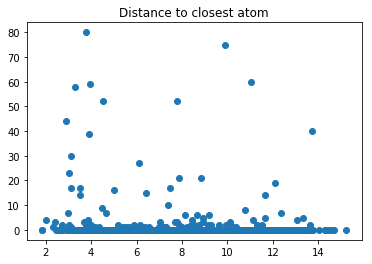

In [40]:
pdbRef = "4eie"
chainRef = "A"
path_to_file = "counterSim/{}{}_heme_vsnucleos.pdb".format(pdbRef, chainRef)
plotDistanceVsBFactor(pdbRef, chainRef, path_to_file)

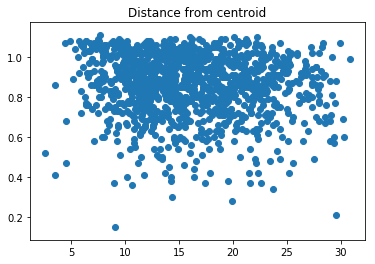

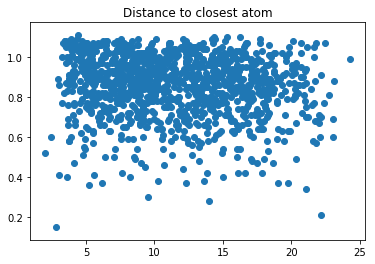

In [41]:
pdbRef = "1h97"
chainRef = "A"
path_to_file = "averageSim/{}{}_heme_vsnucleos.pdb".format(pdbRef, chainRef)
plotDistanceVsBFactor(pdbRef, chainRef, path_to_file)

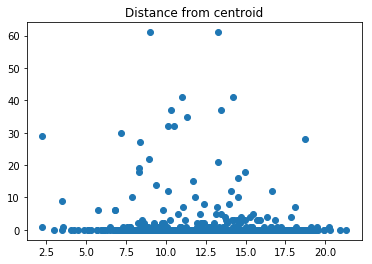

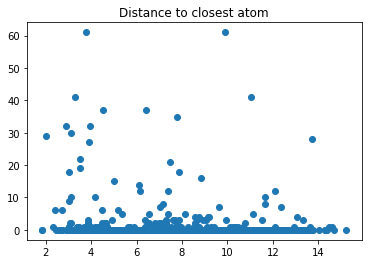

In [42]:
pdbRef = "4eie"
chainRef = "A"
path_to_file = "counterSim/{}{}_heme_vshemes.pdb".format(pdbRef, chainRef)
plotDistanceVsBFactor(pdbRef, chainRef, path_to_file)

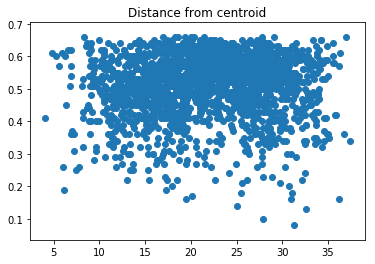

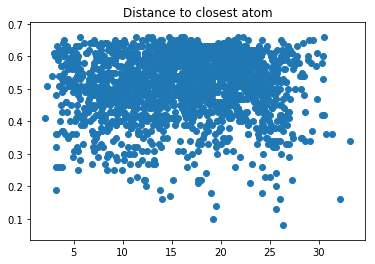

In [47]:
pdbRef = "5y8a"
chainRef = "A"
path_to_file = "averageSim/{}{}_heme_vshemes.pdb".format(pdbRef, chainRef)
plotDistanceVsBFactor(pdbRef, chainRef, path_to_file)

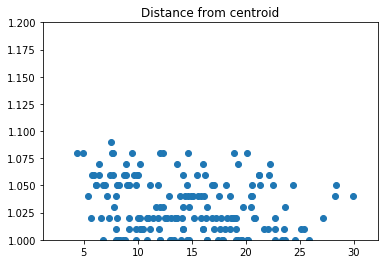

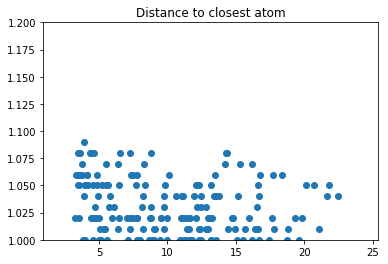

In [5]:
pdbRef = "1h97"
chainRef = "A"
path_to_file = "averageSim/{}{}_heme_vshemes.pdb".format(pdbRef, chainRef)
plotDistanceVsBFactor(pdbRef, chainRef, path_to_file)

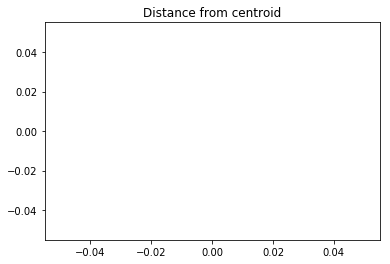

ValueError: zero-size array to reduction operation minimum which has no identity

In [10]:
pdbRef = "3kex"
chainRef = "A"
path_to_file = "/home/wpg/PhD/protein-networks-scaffolding/notebooks/BindingSVMWithDeepDrugDataset/compareAtomicSimilarities/onevsall/r10xi2sigma1/averageSim/{}{}_nucleo_vsnucleos.pdb".format(pdbRef, chainRef)
plotDistanceVsBFactor(pdbRef, chainRef, path_to_file)

